**Kalyan**



In [45]:
import numpy as np
import pandas as pd

# Number of samples
num_samples = 500

# Generate random data for all columns
df = pd.DataFrame({
    'heart_rate': np.random.randint(60, 130, num_samples),
    'weight': np.random.uniform(45, 120, num_samples).round(1),
    'bmi': np.random.uniform(15, 40, num_samples).round(1),
    'steps_per_day': np.random.randint(1000, 25000, num_samples),
    'sleep_hours': np.random.uniform(3, 10, num_samples).round(1),
    'calories_consumed': np.random.randint(1200, 4500, num_samples),
    'water_intake_liters': np.random.uniform(0.5, 5.0, num_samples).round(1),
    'workout_minutes': np.random.randint(0, 120, num_samples)
})

# Assign balanced labels directly (first 250 Fit, next 250 Not Fit)
df['fit_status'] = ['Fit'] * (num_samples // 2) + ['Not Fit'] * (num_samples // 2)

# Shuffle rows to mix data
df = df.sample(frac=1).reset_index(drop=True)

print(df.head())
print(df['fit_status'].value_counts())


   heart_rate  weight   bmi  steps_per_day  sleep_hours  calories_consumed  \
0          99   110.9  21.7           8190          6.4               2415   
1          69    96.7  34.4          18423          4.9               4075   
2         105    60.7  34.3          14776          4.2               2141   
3          68    82.5  36.5          24055          8.9               3074   
4         100    92.1  18.0           9414          9.4               3598   

   water_intake_liters  workout_minutes fit_status  
0                  4.6               53    Not Fit  
1                  4.9               57        Fit  
2                  4.4               10    Not Fit  
3                  4.1               78        Fit  
4                  5.0               74    Not Fit  
fit_status
Not Fit    250
Fit        250
Name: count, dtype: int64


**Mounika**

In [46]:
#checking whether there is any missing values in the dataset
#result-there is no missing values
print("Missing values before preprocessing:\n", df.isnull().sum())

Missing values before preprocessing:
 heart_rate             0
weight                 0
bmi                    0
steps_per_day          0
sleep_hours            0
calories_consumed      0
water_intake_liters    0
workout_minutes        0
fit_status             0
dtype: int64


In [48]:
#in fit_status cloumn there is text data as fit and not_fit converting them into to 0->not fit and 1->fit
df['fit_status'] = df['fit_status'].map({'Fit': 1, 'Not Fit': 0})


In [49]:
#showing first columns of fit_status column to represent they were changed
df['fit_status'].head()

,fit_status
0,0
1,1
2,0
3,1
4,0


In [50]:
#counting how many 0's and how many 1's are present in the fit_status column
print(df['fit_status'].value_counts())


fit_status
0    250
1    250
Name: count, dtype: int64


In [51]:
#getting the glimpse of the data
print(df.describe())


       heart_rate      weight        bmi  steps_per_day  sleep_hours  \
count  500.000000  500.000000  500.00000     500.000000   500.000000   
mean    94.616000   83.204200   27.29680   13309.200000     6.365000   
std     19.935079   22.358896    7.08722    6845.204316     2.028582   
min     60.000000   45.100000   15.00000    1041.000000     3.000000   
25%     77.000000   63.375000   21.00000    7402.250000     4.600000   
50%     95.000000   82.200000   27.50000   13430.000000     6.250000   
75%    111.000000  103.325000   33.50000   19426.500000     8.200000   
max    129.000000  119.700000   40.00000   24930.000000    10.000000   

       calories_consumed  water_intake_liters  workout_minutes  fit_status  
count         500.000000           500.000000       500.000000  500.000000  
mean         2855.172000             2.771800        60.144000    0.500000  
std           944.391095             1.254517        34.358817    0.500501  
min          1203.000000             0.5000

**OMM**

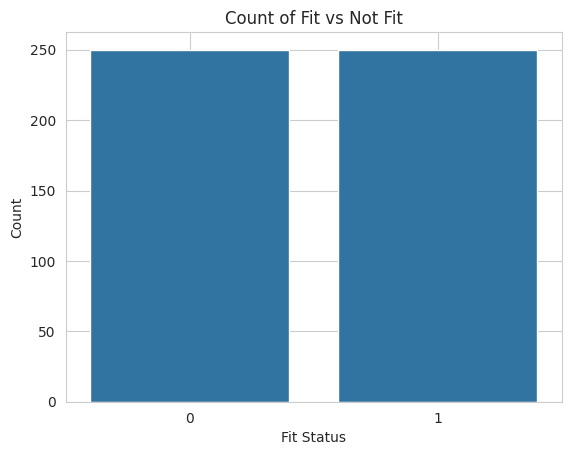

In [57]:
#to understand how many fit and not fit present on the dataset we are using count plot here
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fit_status', data=df)
plt.title("Count of Fit vs Not Fit")
plt.xlabel("Fit Status")
plt.ylabel("Count")
plt.grid(True)
plt.show()


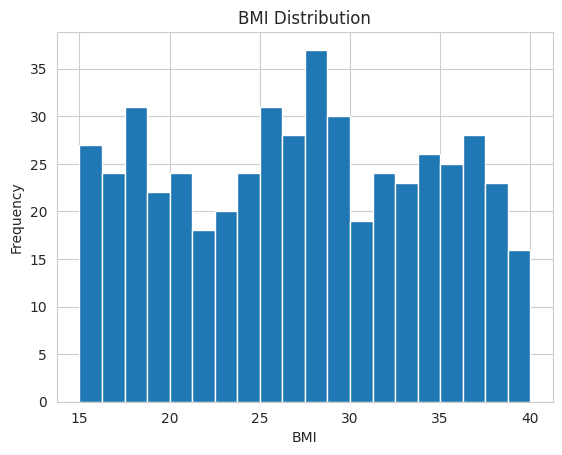

In [58]:
#to detect whether it is skewed or normally distibuted
plt.hist(df['bmi'], bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


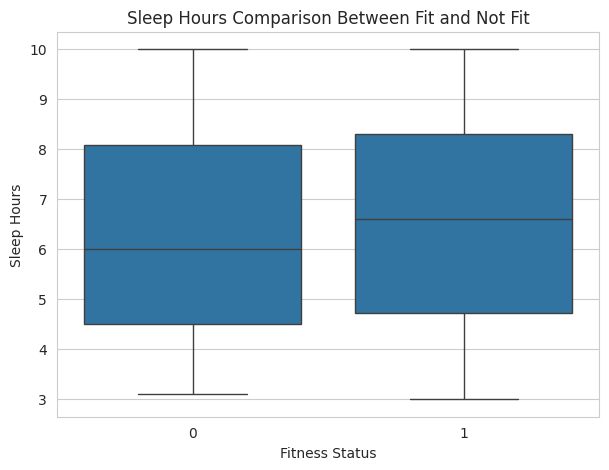

In [62]:
#to compare fit and not fit features in the dataset
plt.figure(figsize=(7, 5))
sns.boxplot(x='fit_status', y='sleep_hours', data=df)
plt.title("Sleep Hours Comparison Between Fit and Not Fit")
plt.xlabel("Fitness Status")
plt.ylabel("Sleep Hours")
plt.show()


**Sailaja**

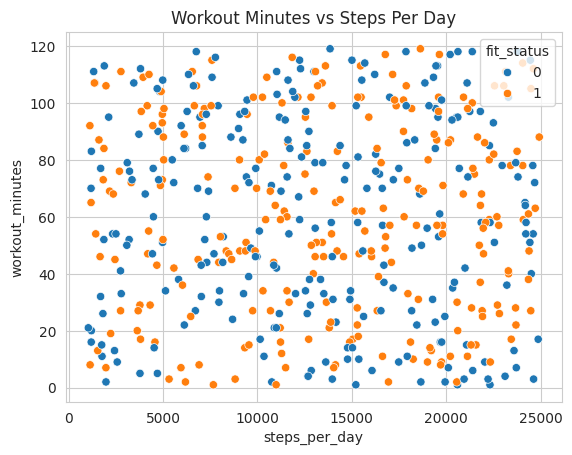

In [59]:
#To check who walks more and who burns more calories on workouts
sns.scatterplot(x='steps_per_day', y='workout_minutes', hue='fit_status', data=df)
plt.title("Workout Minutes vs Steps Per Day")
plt.show()


In [60]:
#to get the corelation of the data
df.corr()

,heart_rate,weight,bmi,steps_per_day,sleep_hours,calories_consumed,water_intake_liters,workout_minutes,fit_status
heart_rate,1.000000,-0.087969,-0.062677,0.018483,-0.004065,0.024582,0.050915,-0.008506,0.061461
weight,-0.087969,1.000000,-0.063649,-0.006427,-0.045103,0.040694,0.104721,-0.100206,-0.040248
bmi,-0.062677,-0.063649,1.000000,0.006869,-0.009159,-0.002401,-0.017769,-0.025002,0.076778
steps_per_day,0.018483,-0.006427,0.006869,1.000000,0.026686,0.040313,0.025560,-0.026651,0.033294
sleep_hours,-0.004065,-0.045103,-0.009159,0.026686,1.000000,-0.019918,0.010187,-0.015620,0.069182
calories_consumed,0.024582,0.040694,-0.002401,0.040313,-0.019918,1.000000,0.018365,-0.015128,-0.028012
water_intake_liters,0.050915,0.104721,-0.017769,0.025560,0.010187,0.018365,1.000000,-0.000389,-0.070696
workout_minutes,-0.008506,-0.100206,-0.025002,-0.026651,-0.015620,-0.015128,-0.000389,1.000000,-0.002447
fit_status,0.061461,-0.040248,0.076778,0.033294,0.069182,-0.028012,-0.070696,-0.002447,1.000000


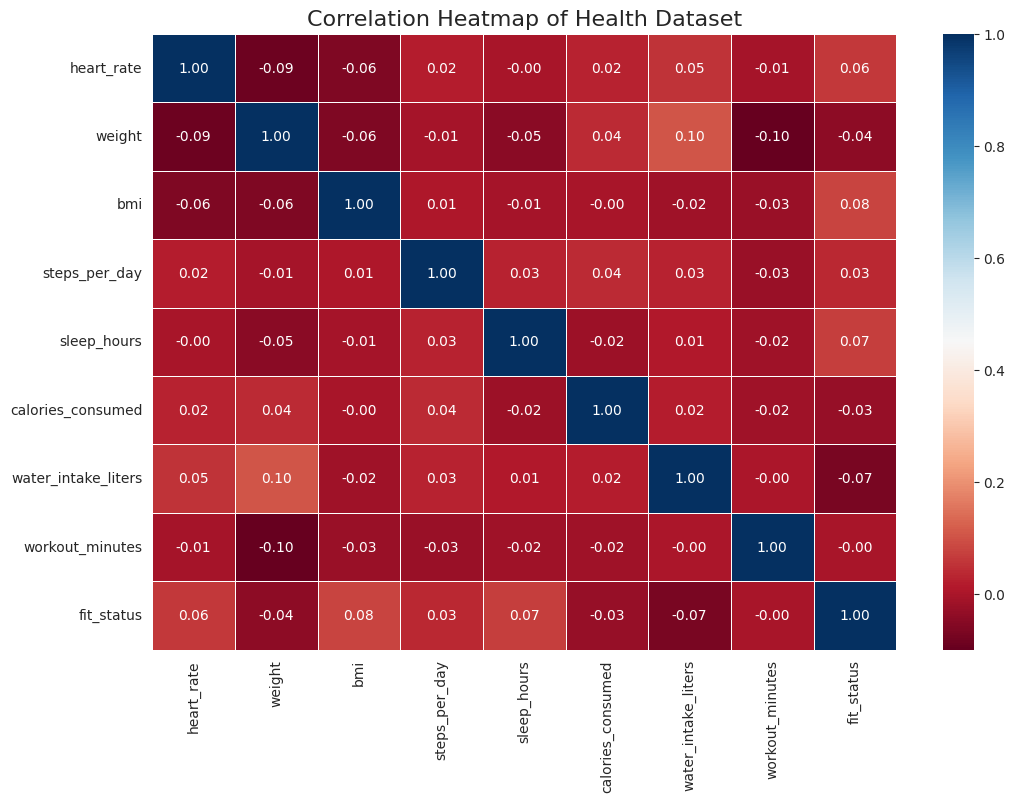

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
#using heatmap to represent the corr as a visualization
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Health Dataset", fontsize=16)
plt.show()


**Pradeeksha**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate features->except fit_status and target->fit_status
X = df.drop('fit_status', axis=1)
y = df['fit_status']

# Split data 80->training:20->testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [68]:
model = LogisticRegression() #using logistic regression model to train

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("trained")

trained


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.metrics import precision_score  #to evalute how well the model performs we are using precision score metric we can also use various metrics

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.5714285714285714


**Sowmya**

In [72]:
# Taking input dynamically and check how it predicts
# belows are the headers that we considered while preparing the data
hr = float(input("Enter Heart Rate: "))
wt = float(input("Enter Weight (kg): "))
bmi_v = float(input("Enter BMI: "))
steps = float(input("Enter Steps per Day: "))
sleep = float(input("Enter Sleep Hours: "))
calories = float(input("Enter Calories Consumed: "))
water = float(input("Enter Water Intake (liters): "))
workout = float(input("Enter Workout Minutes: "))

# Put input into a dataframe for prediction purpose
user_data = pd.DataFrame([[
    hr, wt, bmi_v, steps, sleep, calories, water, workout
]], columns=[
    'heart_rate', 'weight', 'bmi', 'steps_per_day',
    'sleep_hours', 'calories_consumed', 'water_intake_liters',
    'workout_minutes'
])


# Predicting the dynamically given values
prediction = model.predict(user_data)[0]

# For Showing result
if prediction == 1:
    print("\nThe person is FIT")
else:
    print("\nThe person is NOT FIT")


Enter Heart Rate: 74
Enter Weight (kg): 56
Enter BMI: 45
Enter Steps per Day: 1000
Enter Sleep Hours: 7
Enter Calories Consumed: 50
Enter Water Intake (liters): 6
Enter Workout Minutes: 80

The person is FIT
